**`=> importing the dependencies`**

In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**`=> data collection and processsing`**

In [8]:
df= pd.read_csv("train.csv")

In [21]:
#printitng first two rows of dataset
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [19]:
# how many rows & columns in the datset
df.shape

(614, 13)

In [25]:
#check, is there are any null value or not?
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [29]:
# dropping missing values
df= df.dropna()

In [31]:
df.shape

(480, 13)

In [33]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
# label encoding
df.replace({"Loan_Status": {"N": 0, "Y": 1}}, inplace= True)

C:\Users\uttam\AppData\Local\Temp\ipykernel_13904\2985521344.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Loan_Status": {"N": 0, "Y": 1}}, inplace= True)


In [41]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1


In [68]:
df["Credit_History"].value_counts()

Credit_History
1.0    410
0.0     70
Name: count, dtype: int64

In [45]:
# dependent columns values
df["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [49]:
# replacing the value of 3+ to 4
df.replace({"Dependents": {"3+": 4}}, inplace= True)

In [51]:
df["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

**`=> data visulization`**

<Axes: xlabel='Education', ylabel='count'>

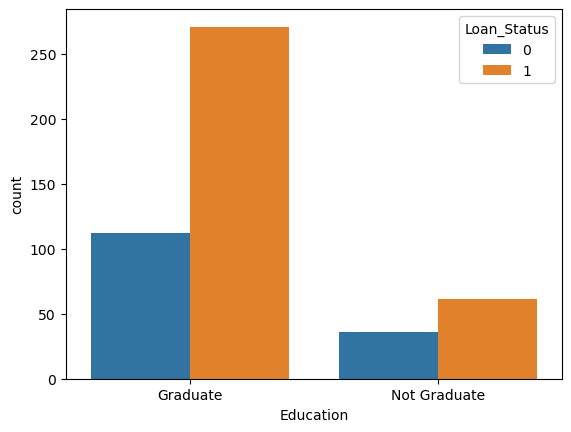

In [62]:
# education and the loan status 
sns.countplot(x= "Education", hue= "Loan_Status", data= df)


<Axes: xlabel='Married', ylabel='count'>

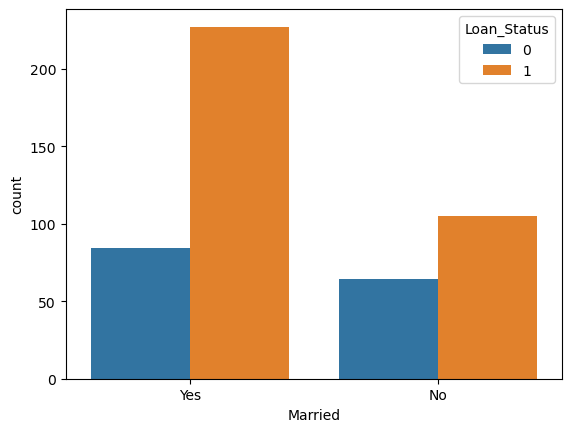

In [66]:
# marital ststus & loan status
sns.countplot(x= "Married", hue= "Loan_Status", data= df)

<Axes: xlabel='Credit_History', ylabel='count'>

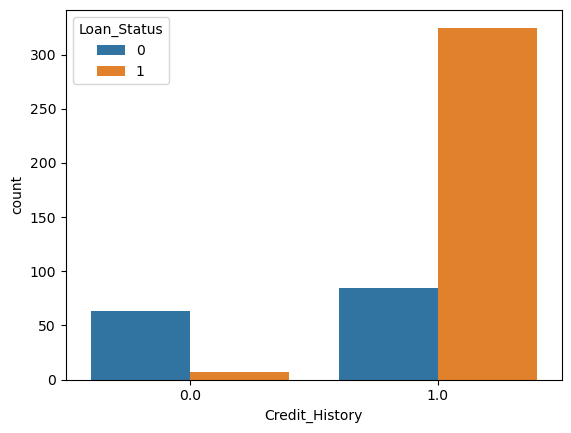

In [74]:
# Credit_History & loan status
sns.countplot(x= "Credit_History", hue= "Loan_Status", data= df)

In [80]:
# convert categorical value into numerical value
df.replace({"Married": {"No": 0, "Yes": 1}, "Gender": {"Male": 1, "Female": 0}, "Self_Employed": {"No": 0, "Yes": 1},
           "Property_Area": {"Rural": 0, "Semiurban": 1, "Urban": 2},"Education": {"Graduate": 1, "Not Graduate": 0}}, inplace= True)

C:\Users\uttam\AppData\Local\Temp\ipykernel_13904\2498983062.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Married": {"No": 0, "Yes": 1}, "Gender": {"Male": 1, "Female": 0}, "Self_Employed": {"No": 0, "Yes": 1},


In [82]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1


In [102]:
#seprating the dat and label
X= df.drop(columns= ["Loan_ID", "Loan_Status"], axis= 1)
Y= df["Loan_Status"]

In [104]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

**`=> splitting train test split`**

In [113]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, stratify= Y, random_state= 42, test_size= 0.1)

In [109]:
print(X_train)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
475       1        1          2          1              1            16525   
456       1        1          0          1              0             4301   
342       1        1          1          0              0             4554   
440       1        0          0          1              0             3660   
250       1        1          0          0              0             1668   
..      ...      ...        ...        ...            ...              ...   
559       0        1          0          1              0             4180   
578       1        1          1          1              0             1782   
205       0        0          0          0              0             4408   
610       1        1          4          1              0             4106   
28        1        0          0          0              0             1442   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [111]:
print(Y_train)

475    1
456    1
342    1
440    1
250    0
      ..
559    1
578    1
205    1
610    1
28     0
Name: Loan_Status, Length: 384, dtype: int64


In [115]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


**`training the model= support vector machine model`**

In [118]:
svm = svm.SVC(kernel= "linear")
svm.fit(X_train, Y_train)

SVC(kernel='linear')

**`=> model evaluation`**

In [125]:
# accuracy score on training data
X_train_pred= svm.predict(X_train)

train_data_accuracy= accuracy_score(X_train_pred, Y_train)

print(train_data_accuracy)

0.8032407407407407


In [129]:
# accuracy score on test data
X_test_pred= svm.predict(X_test)

test_data_accuracy= accuracy_score(X_test_pred, Y_test)

print(test_data_accuracy)

0.7916666666666666


**`=> making prediction status`**

In [157]:
input= (1,1,2,1,0,3200,700,70,360,1,2)

input_as_array= np.array(input)

input_reshape= input_as_array.reshape(1, -1)

prediction= svm.predict(input_reshape)
print(prediction)

if prediction[0] == 0:
    print("You are not eligible for loan")
else:
    print("you are eligible for loan")

[1]
you are eligible for loan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
